In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import pandas_datareader.data as web

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [7]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock]=web.DataReader(stock,'yahoo',start,end)

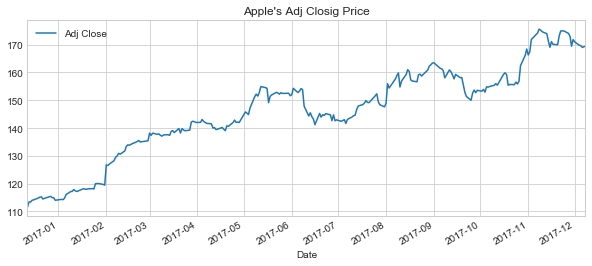

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4),title="Apple's Adj Closig Price")

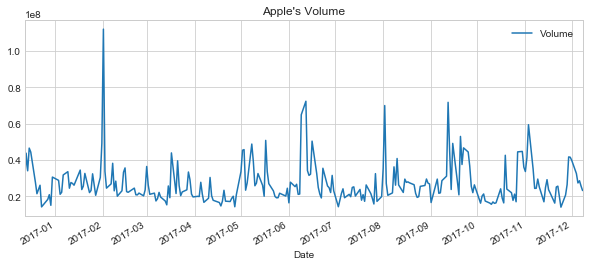

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(10,4),title="Apple's Volume")

In [11]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


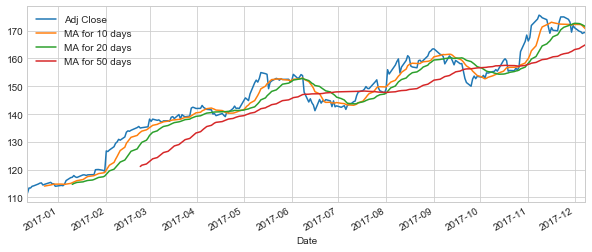

In [12]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

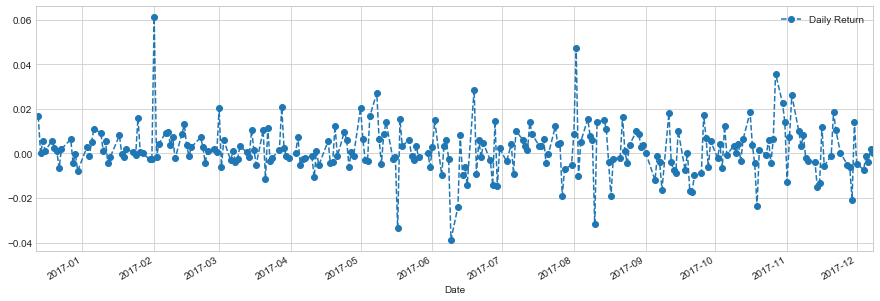

In [13]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,5),legend=True,linestyle='--',marker='o')

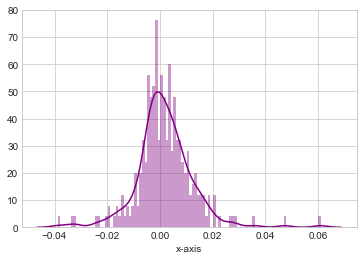

In [14]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple',axlabel='x-axis',label='hist')

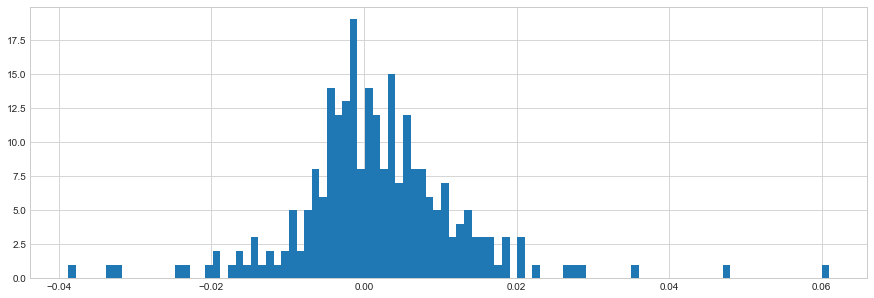

In [15]:
AAPL['Daily Return'].hist(figsize=(15,5),bins=100)

In [16]:
closing_df=web.DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-08,169.369995,1162.000000,1037.050049,84.160004
2017-12-07,169.320007,1159.790039,1030.930054,82.489998
2017-12-06,169.009995,1152.349976,1018.380005,82.779999
2017-12-05,169.639999,1141.569946,1005.150024,81.589996
2017-12-04,169.800003,1133.949951,998.679993,81.080002


In [17]:
tech_rets=closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-08,NaN,NaN,NaN,NaN
2017-12-07,-0.000295,-0.001902,-0.005901,-0.019843
2017-12-06,-0.001831,-0.006415,-0.012174,0.003516
2017-12-05,0.003728,-0.009355,-0.012991,-0.014375
2017-12-04,0.000943,-0.006675,-0.006437,-0.006251


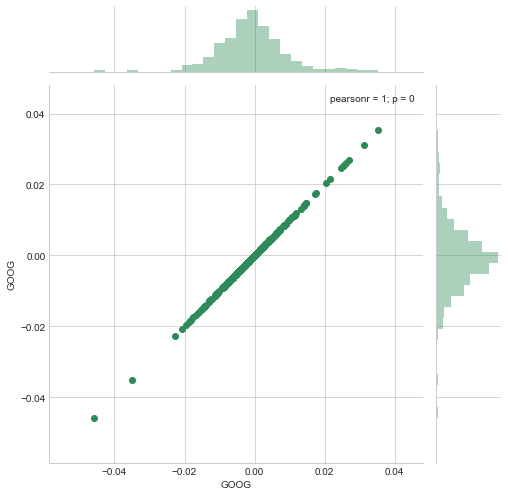

In [18]:
sns.jointplot('GOOG','GOOG',tech_rets,color='seagreen',size=7)

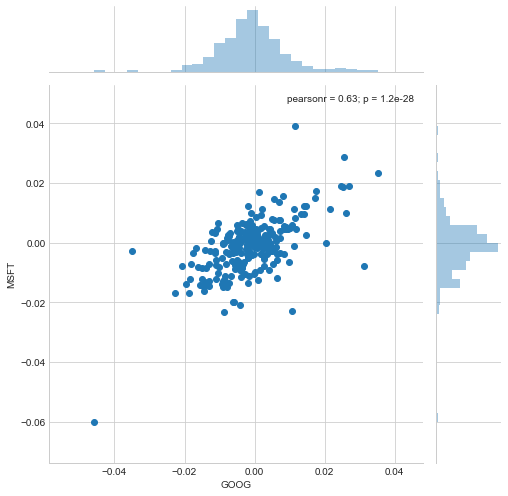

In [19]:
sns.jointplot('GOOG','MSFT',tech_rets,size=7)

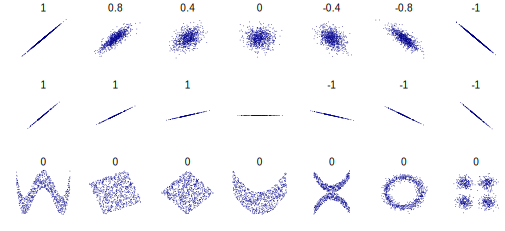

In [20]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

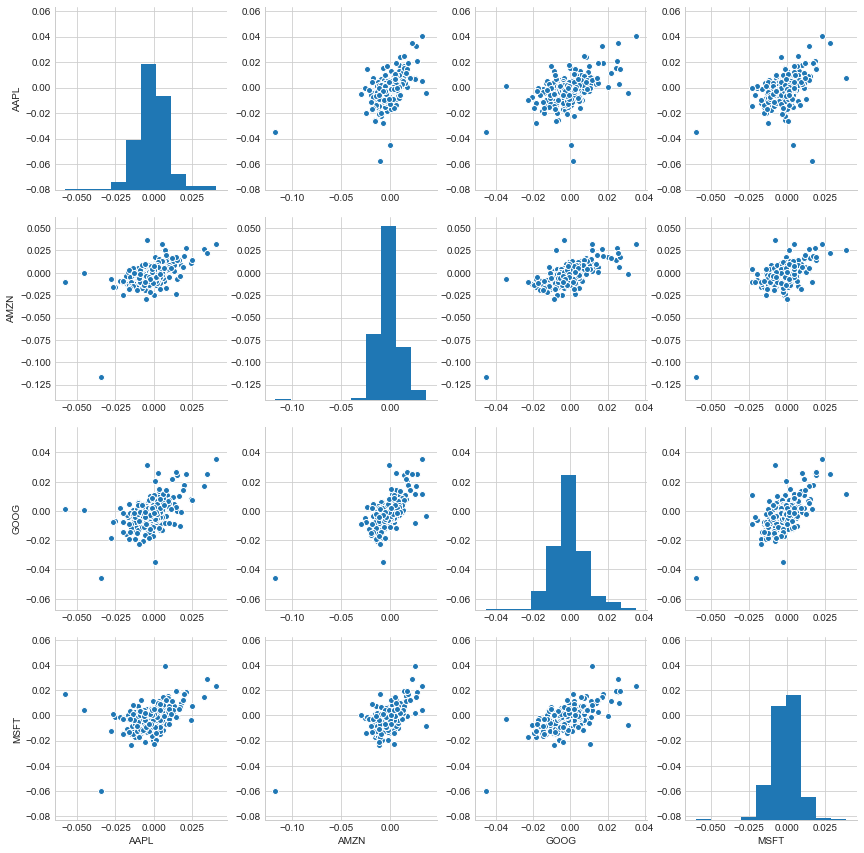

In [21]:
sns.pairplot(tech_rets.dropna(),size=3)

/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


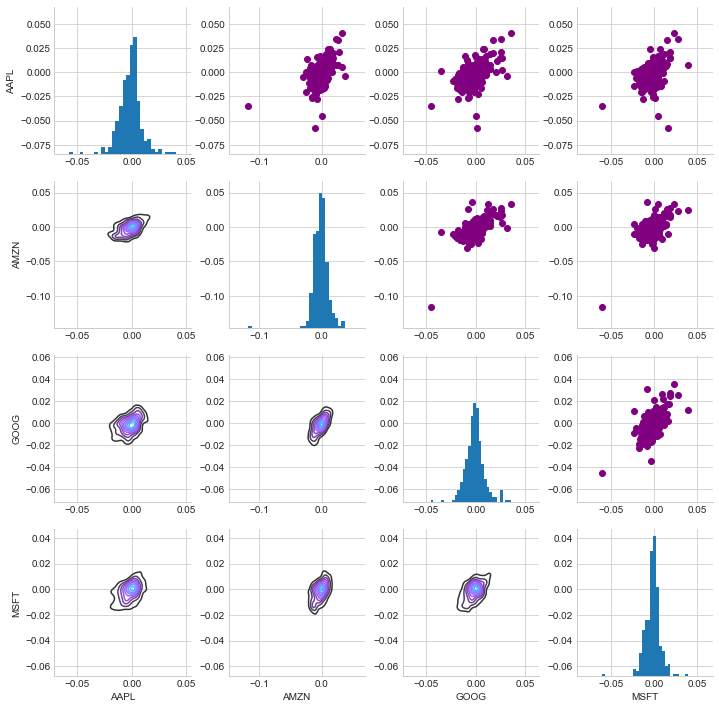

In [22]:
returns_fig=sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

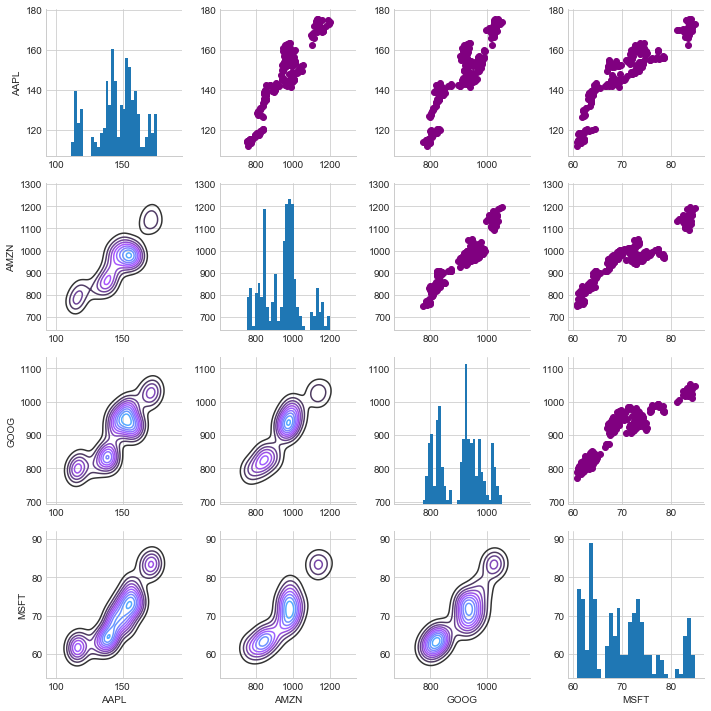

In [23]:
returns_fig=sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

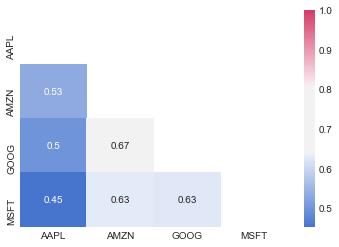

In [24]:
corr=tech_rets.dropna().corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

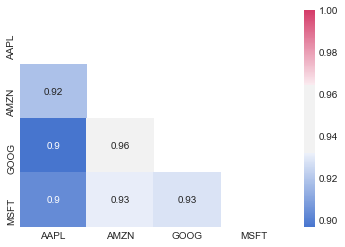

In [25]:
corr=closing_df.dropna().corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

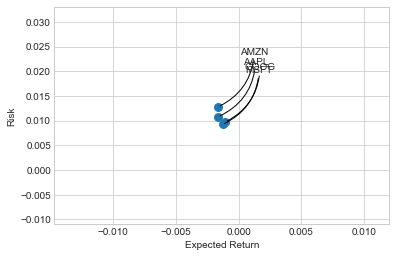

In [26]:
rets=tech_rets.dropna()
area=np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    
    plt.annotate(
    label,
    xy=(x,y),xytext=(50,50),
    textcoords='offset points',ha='right',va='bottom',
    arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

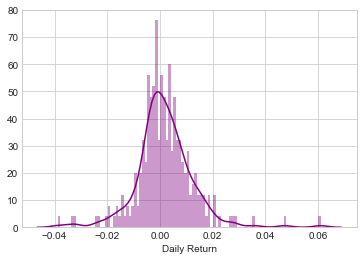

In [27]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [28]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-07,-0.000295,-0.001902,-0.005901,-0.019843
2017-12-06,-0.001831,-0.006415,-0.012174,0.003516
2017-12-05,0.003728,-0.009355,-0.012991,-0.014375
2017-12-04,0.000943,-0.006675,-0.006437,-0.006251
2017-12-01,0.007362,0.025045,0.011505,0.039221


In [29]:
rets['AAPL'].quantile(0.05)

-0.017384636773051958

In [30]:
days=365
dt=1/days
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [34]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    
    price[0]=start_price
    
    shock=np.zeros(days)
    
    drift=np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x]=mu*dt
        
        price[x]=price[x-1]+(price[x-1]*(drift[x]*shock[x]))
        
    return price

In [36]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-12,785.039978,791.250000,784.354980,789.270020,789.270020,2104100
2016-12-13,793.900024,804.380005,793.340027,796.099976,796.099976,2145200
2016-12-14,797.400024,804.000000,794.010010,797.070007,797.070007,1704200
2016-12-15,797.340027,803.000000,792.919983,797.849976,797.849976,1626500
2016-12-16,800.400024,800.856018,790.289978,790.799988,790.799988,2428300


Text(0.5,1,u'Monte Carlo Analysis For Google')

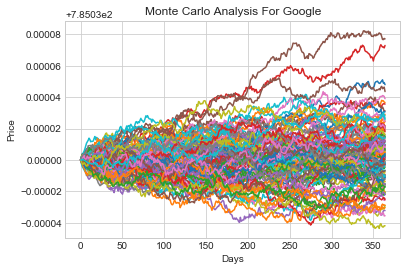

In [37]:
start_price=785.03
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis For Google')

In [42]:
runs=10000
simulations=np.zeros(runs)

for run in xrange(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,u'Finale price distribution of Google stock after 365 days')

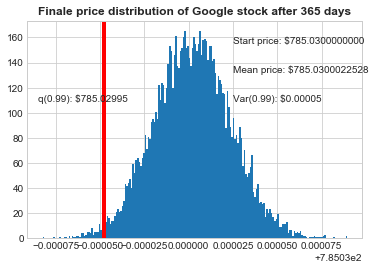

In [46]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#starting price
plt.figtext(0.6,0.8,s="Start price: $%.10f" %start_price)

#mean ending price
plt.figtext(0.6,0.7,"Mean price: $%.10f" %simulations.mean())

#variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6,"Var(0.99): $%.5f" %(start_price-q))

#display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.5f" %q)

#plot a line at 1% quantile result
plt.axvline(x=q,linewidth=4,color='red')

#title
plt.title("Finale price distribution of Google stock after %s days" %days, weight='bold')
